In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr 
import datetime
%matplotlib inline

In [2]:
aapl = pdr.get_data_google('AAPL', start = datetime.datetime(2016, 6, 15), end = datetime.datetime(2017, 6, 15))
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-15,97.82,98.41,97.03,97.14,29445227
2016-06-16,96.45,97.75,96.07,97.55,31326815
2016-06-17,96.62,96.65,95.30,95.33,61008219
2016-06-20,96.00,96.57,95.03,95.10,34411901
2016-06-21,94.94,96.35,94.68,95.91,35546358


In [4]:
train_Y = np.asarray(aapl.High)
train_X = np.asarray([float(x) for x in range(len(train_Y))])
n_samples = train_X.shape[0]
n_samples

253

In [5]:
df = pd.DataFrame({'X': train_X, 'Y': train_Y}) #inside is just dictionary of "x" and "y" to the value arrays. 
df

,X,Y
0,0.0,98.41
1,1.0,97.75
2,2.0,96.65
3,3.0,96.57
4,4.0,96.35
5,5.0,96.89
6,6.0,96.29
7,7.0,94.66
8,8.0,93.05
9,9.0,93.66


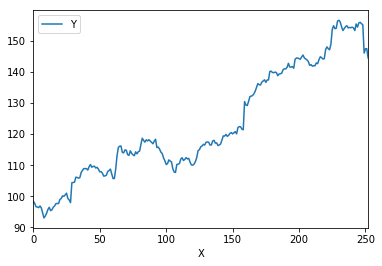

In [6]:
df.plot('X', 'Y')

In [11]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [12]:
weight = tf.Variable(np.random.randn(), name="weight")
bias = tf.Variable(np.random.randn(), name="bias")

In [13]:
# creating a linear model for prediction, y = mx + b
# y = (weight * X) + bias
predict = tf.add(tf.multiply(X, weight), bias)

In [14]:
#mean-squared cost function for error, to determine best model for the data. 
cost = tf.reduce_sum(tf.pow(predict - Y, 2))/(2*n_samples) 
# predictions - real Y values, divided by 2n for n samples. Basic cost function learned from Machine Learning on Coursera. 
#tf.reduce_sum- gives sum of the elements across the dimensions of a tensor

In [15]:
# Gradient Descent used to find the minimum of the cost function 
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
init = tf.global_variables_initializer()

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    training_epochs = 1000
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict= {X: x, Y: y})
            # run the gradient descent on the calculated values/cost function
        #Display logs per epoch step
        display_step = 50
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "weight (w) =", sess.run(weight), "bias (b) =", sess.run(bias))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(weight), "b=", sess.run(bias), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(weight) * train_X + sess.run(bias), label='Fitted line')
    plt.legend()
    plt.show()

Epoch: 0050 cost= 105194.734375000 weight (w) = -2.38426 bias (b) = 6.59256
Epoch: 0100 cost= 103967.656250000 weight (w) = -2.4163 bias (b) = 14.6725
Epoch: 0150 cost= 102819.187500000 weight (w) = -2.44692 bias (b) = 22.3871
Epoch: 0200 cost= 101732.117187500 weight (w) = -2.47602 bias (b) = 29.7526
Epoch: 0250 cost= 100698.945312500 weight (w) = -2.50362 bias (b) = 36.7847
Epoch: 0300 cost= 99761.164062500 weight (w) = -2.53047 bias (b) = 43.4983
Epoch: 0350 cost= 98856.562500000 weight (w) = -2.55576 bias (b) = 49.909
Epoch: 0400 cost= 98022.023437500 weight (w) = -2.58016 bias (b) = 56.0306
Epoch: 0450 cost= 97209.453125000 weight (w) = -2.60302 bias (b) = 61.875
Epoch: 0500 cost= 96461.406250000 weight (w) = -2.62511 bias (b) = 67.4541
Epoch: 0550 cost= 95765.359375000 weight (w) = -2.64633 bias (b) = 72.7799
Epoch: 0600 cost= 95107.179687500 weight (w) = -2.66656 bias (b) = 77.865
Epoch: 0650 cost= 94479.968750000 weight (w) = -2.68576 bias (b) = 82.7204
Epoch: 0700 cost= 93895.